## Investment Case Study:

##### Importing necessery libraries

In [1]:
import pandas as pd
import numpy as np

##### Imprting csv files

###### There are two types engines while reading - C & Python
C is more faster while python engine is feature rich 
i have used engine python for the companies as it has diverce of data where as i have kept default engine for other file loadings.

In [605]:
companies = pd.read_csv('./companies.txt', sep='\t', encoding = "ISO-8859-1", engine='python')
mapping = pd.read_csv('./mapping.csv', index_col='category_list')
funding_rounds = pd.read_csv('./rounds2.csv', encoding = "ISO-8859-1")
pd.options.display.float_format = '{:,.2f}'.format
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


###### Q: Unique companies in  funding round 

In [606]:
funding_rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


In [607]:
lower_fn = lambda x : x.lower()

In [608]:
funding_rounds['company_permalink'] = funding_rounds['company_permalink'].apply(lower_fn)
funding_rounds.company_permalink.nunique()

66370

###### Q: Unique companies in company table

In [609]:
companies['permalink'] = companies['permalink'].apply(lower_fn)
companies.permalink.nunique()

66368

### Q3: Are there any companies in the rounds2 file which are not present in companies?

#####  Missing companies in companies csv and present in funding round: 

In [610]:
# Result mainely have difference of special character
result1 = funding_rounds[~funding_rounds.company_permalink.isin(companies.permalink)].company_permalink
result1

29597                               /organization/e-cãbica
31863          /organization/energystone-games-çµç³æ¸¸æ
45176                  /organization/huizuche-com-æ ç§ÿè½¦
58473                /organization/magnet-tech-ç£ç³ç§æ
101036    /organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...
109969               /organization/weiche-tech-åè½¦ç§æ
113839                   /organization/zengame-ç¦
æ¸¸ç§æ
Name: company_permalink, dtype: object

#####  Missing companies in funding csv and present in companies: 

In [611]:
result2 = companies[~companies.permalink.isin(funding_rounds.company_permalink)].permalink
result2

16827                              /organization/e-cãbica
18197         /organization/energystone-games-çµçÿ³æ¸¸æ
26139                 /organization/huizuche-com-æ ç§è½¦
58344    /organization/tipcat-interactive-æ²èä¿¡æ¯ç...
65778                   /organization/zengame-ç¦
æ¸¸ç§æ
Name: permalink, dtype: object

#### Ans: Yes, we can conclude that there are there companies in funding round which are not present in companies table

### Q:  Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [612]:
master_frame = pd.merge(funding_rounds, companies, left_on='company_permalink', right_on='permalink', how='left')
master_frame.shape

(114949, 16)

#### Ans: there are 114949 frames present in master table

## Cleaning the data

In [613]:
master_frame.isnull().any(axis=0)


company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                   True
name                        True
homepage_url                True
category_list               True
status                      True
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [614]:
percentage = round ( (100 * ( master_frame.isnull().sum() / len(master_frame.index) ) ), 2 ) 
percentage


company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.01
name                       0.01
homepage_url               5.34
category_list              2.97
status                     0.01
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.86
dtype: float64

In [615]:
master_frame = master_frame.drop('funding_round_code', axis=1)
percentage = round ( (100 * ( master_frame.isnull().sum() / len(master_frame.index) ) ), 2 ) 
percentage

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.01
name                       0.01
homepage_url               5.34
category_list              2.97
status                     0.01
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.86
dtype: float64

In [616]:
# Remove the rows where there are rows with more than 5 null values
master_frame[master_frame.isnull().sum(axis=1) > 5]
master_frame = master_frame[master_frame.isnull().sum(axis=1) <=5]
master_frame.shape


(112117, 15)

In [617]:
percentage = round ( (100 * ( master_frame.isnull().sum() / len(master_frame.index) ) ), 2 ) 
percentage

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         16.14
permalink                  0.00
name                       0.00
homepage_url               4.18
category_list              1.66
status                     0.00
country_code               5.24
state_code                 7.24
region                     6.54
city                       6.54
founded_at                16.23
dtype: float64

In [618]:
# clean the data where raised amount is NAN which is primary and it chnages the Mean, deviation and % speard accross also
# so removing the outliers which are NAN
master_frame = master_frame[~np.isnan(master_frame.raised_amount_usd)]
percentage = round ( (100 * ( master_frame.isnull().sum() / len(master_frame.index) ) ), 2 ) 
percentage

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               3.76
category_list              0.76
status                     0.00
country_code               5.23
state_code                 7.09
region                     6.50
city                       6.50
founded_at                16.02
dtype: float64

In [619]:
master_frame.raised_amount_usd.describe()

count           94,025.00
mean        10,407,722.30
std        115,320,900.07
min                  0.00
25%            325,000.00
50%          1,682,988.00
75%          7,000,000.00
max     21,271,935,000.00
Name: raised_amount_usd, dtype: float64

In [620]:
# master_frame.raised_amount_usd.astype(int)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94025 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          94025 non-null object
funding_round_permalink    94025 non-null object
funding_round_type         94025 non-null object
funded_at                  94025 non-null object
raised_amount_usd          94025 non-null float64
permalink                  94025 non-null object
name                       94024 non-null object
homepage_url               90493 non-null object
category_list              93309 non-null object
status                     94025 non-null object
country_code               89104 non-null object
state_code                 87355 non-null object
region                     87911 non-null object
city                       87914 non-null object
founded_at                 78965 non-null object
dtypes: float64(1), object(14)
memory usage: 11.5+ MB


### Q: most representative value of the investment amount for each of all funding  types

In [621]:
master_frame_group_by = master_frame.groupby('funding_round_type')
master_frame_group_by.mean()

,raised_amount_usd
funding_round_type,
angel,"959,636.43"
convertible_note,"1,457,385.98"
debt_financing,"17,051,194.78"
equity_crowdfunding,"520,060.72"
grant,"4,318,915.00"
non_equity_assistance,"411,203.05"
post_ipo_debt,"168,704,571.82"
post_ipo_equity,"82,384,169.84"
private_equity,"73,086,734.51"


####  Most suitable for Spark Funds ?

In [622]:
invest_range_fn = lambda frame: ((frame.raised_amount_usd.mean() >= 5000000) & (frame.raised_amount_usd.mean() <= 15000000))
spark_investments = master_frame_group_by.filter(invest_range_fn)
spark_investments

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010


In [623]:
# sutiable investement type for 
spark_investments['funding_round_type'].unique()

array(['venture'], dtype=object)

#### Ans: Most suitable funding type: venture

#### Q: Top 9 countries investement total:

In [624]:
# Top nine countries which have received the highest total funding 
top9_countries = spark_investments.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).head(9)
top9_countries


country_code
USA   422,510,842,796.00
CHN    39,835,418,773.00
GBR    20,234,971,737.00
IND    14,391,858,718.00
CAN     9,583,332,317.00
FRA     7,259,536,732.00
ISR     6,905,014,579.00
DEU     6,346,959,822.00
JPN     3,363,676,611.00
Name: raised_amount_usd, dtype: float64

#### Q: Top 9 countries data frame:

In [625]:

top9_countries_data = spark_investments[spark_investments.country_code.isin(top9_countries.index.values)]
top9_countries_data

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,"265,940.00",/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008


#### Fetch list of countries and top english speaking countries:

In [626]:
import requests, bs4

In [627]:
resp = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_English-speaking_population')
soup = bs4.BeautifulSoup(resp.content,'lxml')
table = soup.find_all('table')[0] 
countries_list = pd.read_html(str(table))[0]
countries_list.columns = countries_list.iloc[0]

headers = countries_list.iloc[0]
countries_list  = pd.DataFrame(countries_list.values[1:], columns=headers)
countries_list.drop(['As first language', 'As first language (%)', 'As an additional language[note 1]', 'Comments', 'As an additional language (%)'], axis=1, inplace=True)
countries_list = countries_list[~countries_list['Country'].isin(['TOTAL', 'Marshall Islands', 'Pakistan'])]
countries_list['Total English speakers'] = countries_list['Total English speakers'].astype(float)
countries_list.sort_values('Total English speakers', ascending=False)
countries_list.shape


(122, 4)

In [628]:
country_codes = pd.read_csv('country-codes_csv.csv')

In [629]:
english_speakers = pd.merge(countries_list, country_codes[['ISO3166-1-Alpha-3','official_name_en']], right_on='official_name_en', left_on='Country', how='inner')
english_speakers.head()

,Country,Eligible population,Total English speakers,Total English speakers (%),ISO3166-1-Alpha-3,official_name_en
0,United States,296603003,"283,160,411.00",95.46,USA,United States
1,India,1028737436,"125,344,737.00",12.18,IND,India
2,Nigeria,156493000,"79,000,000.00",53.34,NGA,Nigeria
3,Philippines,110437852,"92,025,890.00",94.73,PHL,Philippines
4,United Kingdom,64000000,"59,600,000.00",97.74,GBR,United Kingdom


### Q: Top 3 english Speaking countries

In [630]:
top9_countries_with_speaking_percentage = english_speakers[english_speakers['ISO3166-1-Alpha-3'].isin(top9_countries.index.values)]
top9_countries_with_speaking_percentage.reset_index(drop=True)
top9_countries_with_speaking_percentage.head(5)


,Country,Eligible population,Total English speakers,Total English speakers (%),ISO3166-1-Alpha-3,official_name_en
0,United States,296603003,"283,160,411.00",95.46,USA,United States
1,India,1028737436,"125,344,737.00",12.18,IND,India
4,United Kingdom,64000000,"59,600,000.00",97.74,GBR,United Kingdom
5,Germany,80600000,"45,400,000.00",56,DEU,Germany
6,Canada,34767255,"29,973,590.00",86.21,CAN,Canada


In [631]:
master_frame.head(3)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN


In [632]:
mapping = pd.read_csv('./mapping.csv')

mapping = mapping.replace({'^0': 'Na', '0': 'na'}, regex=True)
mapping = mapping.set_index(['category_list'])
all_indexes = np.array(mapping.index.values[1:])

def fetch_main_category(x):
    if pd.notna(x):
        _categories = np.array(x.split("|"))
        _categories = np.intersect1d(_categories, all_indexes)
        if (_categories.size == 0):
            return ''
        else:
            return mapping.loc[_categories[0]].idxmax(axis=1)
    else:
        return ''
    
    


In [633]:
# ====> Adding main sector
master_frame['main_sector'] = master_frame.category_list.apply(fetch_main_category)
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging"
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,"41,250.00",/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Entertainment
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,"43,360.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,"3,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising"
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising"
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising"


In [634]:
# ====> Adding main sector
top9_countries_data['main_sector'] = top9_countries_data.category_list.apply(fetch_main_category)
top9_countries_data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging"
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising"
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising"
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising"
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging"
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Others
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,"News, Search and Messaging"
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,"265,940.00",/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,"News, Search and Messaging"


#####  Adding primary sector:

In [635]:
def fetch_primary_category(x):
    if pd.notna(x):
        return x.split("|")[0]
    else:
        return ''

In [636]:
master_frame['primary_sector'] = master_frame.category_list.apply(fetch_primary_category)
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,"News, Search and Messaging",Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,"News, Search and Messaging",Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging",Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,"41,250.00",/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Entertainment,Games
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,"43,360.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors,Biotechnology
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors,Biotechnology
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,"3,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics


In [637]:
top9_countries_data['primary_sector'] = top9_countries_data.category_list.apply(fetch_primary_category)
top9_countries_data

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,"News, Search and Messaging",Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Cleantech / Semiconductors,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging",Apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Others,Education
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,"News, Search and Messaging",Curated Web
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,"265,940.00",/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,"News, Search and Messaging",Curated Web


In [638]:

# top 3 countries 

top3 = list(top9_countries_with_speaking_percentage['ISO3166-1-Alpha-3'].iloc[:3])

# US funding in the range of 5M to 15M 
# D1 = top9_countries_data[(top9_countries_data.country_code == top3[0]) & (top9_countries_data.raised_amount_usd >= 5000000) & (top9_countries_data.raised_amount_usd <= 15000000)]
D1 = top9_countries_data[(top9_countries_data.country_code == top3[0])]

# IND funding in the range of 5M to 15M 
# D2 = top9_countries_data[(top9_countries_data.country_code == top3[1]) & (top9_countries_data.raised_amount_usd >= 5000000) & (top9_countries_data.raised_amount_usd <= 15000000)]
D2 = top9_countries_data[(top9_countries_data.country_code == top3[1])]

# GBR funding in the range of 5M to 15M 
# D3 = top9_countries_data[(top9_countries_data.country_code == top3[2]) & (top9_countries_data.raised_amount_usd >= 5000000) & (top9_countries_data.raised_amount_usd <= 15000000)]
D3 = top9_countries_data[(top9_countries_data.country_code == top3[2])]

D3



,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,primary_sector
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Others,Education
368,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,"2,274,716.00",/organization/31dover,31Dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,H9,London,London,01-07-2012,Others,E-Commerce
401,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,"5,500,000.00",/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,"Social, Finance, Analytics, Advertising",Android
402,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,"1,200,000.00",/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,"Social, Finance, Analytics, Advertising",Android
550,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,"15,152,514.00",/organization/3sun,3sun,http://3sungroup.com,Clean Technology,operating,GBR,I9,NaN,NaN,01-01-2007,Cleantech / Semiconductors,Clean Technology
665,/organization/4th-office,/funding-round/cb31013634b75ce3fd5f58de0c30ec6e,venture,03-12-2014,"3,607,956.00",/organization/4th-office,4th Office,https://www.4thoffice.com,Office Space,operating,GBR,NaN,NaN,NaN,NaN,Others,Office Space
784,/organization/60mo,/funding-round/a6d521005229961ab858d840d9c80408,venture,19-01-2011,"1,000,000.00",/organization/60mo,60mo,http://60mo.com,Accounting|Business Development|Finance|Softwa...,acquired,GBR,U8,Edinburgh,Edinburgh,01-06-2009,"Social, Finance, Analytics, Advertising",Accounting
864,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,"8,468,328.00",/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,Entertainment,Content Creators
865,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,"10,000,000.00",/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,Entertainment,Content Creators
942,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,"15,000,000.00",/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Entertainment,Media


In [640]:
no_of_invt_by_sector = D1.groupby('main_sector')['main_sector'].count()
usd_by_sector = D1.groupby('main_sector')['raised_amount_usd'].sum()

D1['no_of_invt_by_sector'] = D1.main_sector.apply(lambda x: no_of_invt_by_sector[x])
D1['usd_by_sector'] = D1.main_sector.apply(lambda x: usd_by_sector[x])
D1.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,primary_sector,no_of_invt_by_sector,usd_by_sector
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics,7272,"86,531,393,400.00"
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics,7272,"86,531,393,400.00"
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",Analytics,7272,"86,531,393,400.00"
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging",Apps,4345,"45,468,873,603.00"
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000.00",/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,"News, Search and Messaging",Curated Web,4345,"45,468,873,603.00"


In [641]:
d2_no_of_invt_by_sector = D2.groupby('main_sector')['main_sector'].count()
d2_usd_by_sector = D2.groupby('main_sector')['raised_amount_usd'].sum()

D2['no_of_invt_by_sector'] = D2.main_sector.apply(lambda x: d2_no_of_invt_by_sector[x])
D2['usd_by_sector'] = D2.main_sector.apply(lambda x: d2_usd_by_sector[x])
D2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,primary_sector,no_of_invt_by_sector,usd_by_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment,Media,76,"976,191,777.00"
227,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,"6,369,507.00",/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,Others,E-Commerce,284,"6,329,507,440.00"
265,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,06-11-2007,"4,000,000.00",/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,Others,EdTech,284,"6,329,507,440.00"
493,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,01-12-2007,"1,240,000.00",/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,Manufacturing,3D,55,"730,260,000.00"
494,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,01-08-2010,"825,000.00",/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,Manufacturing,3D,55,"730,260,000.00"


In [642]:
d3_no_of_invt_by_sector = D3.groupby('main_sector')['main_sector'].count()
d3_usd_by_sector = D3.groupby('main_sector')['raised_amount_usd'].sum()

D3['no_of_invt_by_sector'] = D3.main_sector.apply(lambda x: d3_no_of_invt_by_sector[x])
D3['usd_by_sector'] = D3.main_sector.apply(lambda x: d3_usd_by_sector[x])
D3.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,primary_sector,no_of_invt_by_sector,usd_by_sector
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Others,Education,515,"4,466,031,352.00"
368,/organization/31dover,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,"2,274,716.00",/organization/31dover,31Dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,H9,London,London,01-07-2012,Others,E-Commerce,515,"4,466,031,352.00"
401,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,"5,500,000.00",/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,"Social, Finance, Analytics, Advertising",Android,418,"3,759,056,966.00"
402,/organization/365scores,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,"1,200,000.00",/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,"Social, Finance, Analytics, Advertising",Android,418,"3,759,056,966.00"
550,/organization/3sun,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,"15,152,514.00",/organization/3sun,3sun,http://3sungroup.com,Clean Technology,operating,GBR,I9,NaN,NaN,01-01-2007,Cleantech / Semiconductors,Clean Technology,442,"5,073,290,093.00"


#### **Country USA stats:** 

##### Q: Total number of investments (count)

In [643]:
D1.raised_amount_usd.size

36139

##### Q: Total amount of investment (USD)

In [644]:
D1.raised_amount_usd.sum()

422510842796.0

#####  Q: Top sector (based on count of investments)

In [645]:
no_of_investements = D1.groupby('main_sector')['primary_sector'].count().nlargest(3)
no_of_investements

main_sector
Others                                     8304
Cleantech / Semiconductors                 7996
Social, Finance, Analytics, Advertising    7272
Name: primary_sector, dtype: int64

In [646]:
no_of_investements.index[0]

'Others'

##### Q: Second-best sector (based on count of investments)

In [648]:
no_of_investements.index[1]

'Cleantech / Semiconductors'

##### Q: Third-best sector (based on count of investments)

In [649]:
no_of_investements.index[2]

'Social, Finance, Analytics, Advertising'

##### Q: Number of investments in the top sector (refer to point 3)

In [650]:
no_of_investements[0]

8304

##### Q: Number of investments in the second-best sector (refer to point 4)

In [651]:
no_of_investements[1]

7996

##### Q: Number of investments in the third-best sector (refer to point 5)

In [652]:
no_of_investements[2]

7272

##### Q: For the top sector count-wise (point 3), which company received the highest investment?

In [653]:
# fil_fn = lambda frame: frame.primary_sector == 'Others'
fil_fn = lambda frame: (frame.primary_sector == 'Others' )

inv_by_companies = D1[(D1.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(10)


name
Terascala                    13
VectorMAX                    12
Lecere                       11
BTI Systems                  10
Appcelerator                  9
Approva                       9
Delivery Agent                9
Satmetrix                     9
Solarflare Communications     9
Virtustream                   9
Name: raised_amount_usd, dtype: int64

##### Q: For point 4 (second best sector count-wise), which company received the highest investment?

In [691]:
inv_by_companies = D1[(D1.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(10)

name
Aviir                         12
Covenant Surgical Partners    12
Galectin Therapeutics         12
Tigo Energy                   12
CNS Response                  11
AirXpanders                   10
Harvest Power                 10
ImThera Medical Inc           10
QD Vision                     10
ViewRay                       10
Name: raised_amount_usd, dtype: int64

#### **Country IND stats:** 

##### Q: Total number of investments (count)

In [693]:
D2.raised_amount_usd.size

824

##### Q: Total amount of investment (USD)

In [656]:
D2.raised_amount_usd.sum()

14391858718.0

#####  Q: Top sector (based on count of investments)

In [694]:
no_of_investements = D2.groupby('main_sector')['primary_sector'].count().nlargest(4)
no_of_investements

main_sector
Others                                     284
Social, Finance, Analytics, Advertising    147
News, Search and Messaging                 130
Entertainment                               76
Name: primary_sector, dtype: int64

In [658]:
no_of_investements.index[0]

'Others'

##### Q: Second-best sector (based on count of investments)

In [659]:
no_of_investements.index[1]

'Social, Finance, Analytics, Advertising'

##### Q: Third-best sector (based on count of investments)

In [660]:
no_of_investements.index[2]

'News, Search and Messaging'

##### Q: Number of investments in the top sector (refer to point 3)

In [661]:
no_of_investements[0]

284

##### Q: Number of investments in the second-best sector (refer to point 4)

In [662]:
no_of_investements[1]

147

##### Q: Number of investments in the third-best sector (refer to point 5)

In [663]:
no_of_investements[2]

130

##### Q: For the top sector count-wise (point 3), which company received the highest investment?

In [695]:
inv_by_companies = D2[(D2.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Flipkart                        9
Myntra                          8
Canvera Digital Technologies    5
Snapdeal                        5
TutorVista.com                  5
Name: raised_amount_usd, dtype: int64

##### Q: For the second-best sector count-wise (point 4), which company received the highest investment?

In [697]:
inv_by_companies = D2[(D2.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Manthan Systems    6
Komli Media        4
PolicyBazaar       4
ShopClues.com      4
BankBazaar.com     3
Name: raised_amount_usd, dtype: int64

#### **Country UK stats:** 

##### Q: Total number of investments (count)

In [699]:
D3.raised_amount_usd.size

2054

##### Q: Total amount of investment (USD)

In [701]:
D3.raised_amount_usd.sum()

20234971737.0

#####  Q: Top sector (based on count of investments)

In [702]:
no_of_investements = D3.groupby('main_sector')['primary_sector'].count().nlargest(4)
no_of_investements

main_sector
Others                                     515
Cleantech / Semiconductors                 442
Social, Finance, Analytics, Advertising    418
News, Search and Messaging                 242
Name: primary_sector, dtype: int64

In [669]:
no_of_investements.index[0]

'Others'

##### Q: Second-best sector (based on count of investments)

In [670]:
no_of_investements.index[1]

'Cleantech / Semiconductors'

##### Q: Third-best sector (based on count of investments)

In [671]:
no_of_investements.index[2]

'Social, Finance, Analytics, Advertising'

##### Q: Number of investments in the top sector (refer to point 3)

In [672]:
no_of_investements[0]

515

##### Q: Number of investments in the second-best sector (refer to point 4)

In [673]:
no_of_investements[1]

442

##### Q: Number of investments in the third-best sector (refer to point 5)

In [674]:
no_of_investements[2]

418

##### Q: For the top sector count-wise (point 3), which company received the highest investment?

In [703]:
inv_by_companies = D3[(D3.main_sector == no_of_investements.index[0])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Rostima           8
Electric Cloud    7
Helveta           6
picoChip          6
CriticalBlue      5
Name: raised_amount_usd, dtype: int64

##### Q: For the second-best sector count-wise (point 4), which company received the highest investment?

In [704]:
inv_by_companies = D3[(D3.main_sector == no_of_investements.index[1])].groupby('name')['raised_amount_usd'].count()
inv_by_companies.nlargest(5)


name
Green Biologics                     6
Population Genetics Technologies    6
F-star Biotechnology Limited        5
Horizon Discovery                   5
Intelligent Energy                  5
Name: raised_amount_usd, dtype: int64

## Plottings:

In [677]:
df = master_frame_group_by.sum()
df


,raised_amount_usd
funding_round_type,
angel,"4,651,357,760.00"
convertible_note,"2,097,178,420.00"
debt_financing,"113,578,008,437.00"
equity_crowdfunding,"611,591,405.00"
grant,"9,130,186,317.00"
non_equity_assistance,"30,017,823.00"
post_ipo_debt,"25,643,094,917.00"
post_ipo_equity,"51,490,106,151.00"
private_equity,"139,668,749,655.00"


In [678]:
import matplotlib.pyplot as plt
import seaborn as sns

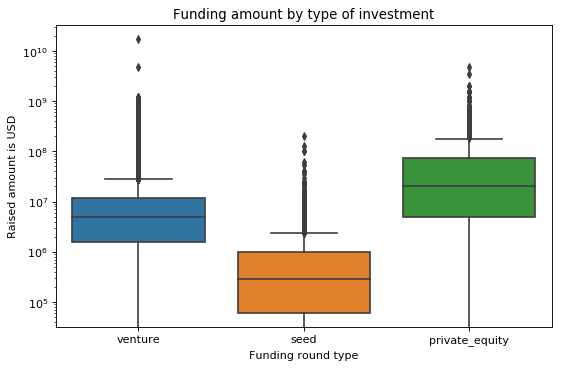

In [679]:
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='r')
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame[master_frame.funding_round_type.isin(['venture', 'private_equity', 'seed'])])
plt.yscale('log')
plt.xlabel('Funding round type')
plt.ylabel('Raised amount is USD')
plt.title('Funding amount by type of investment')
plt.show()

###### Top 9 countries against the total amount of investments of funding type venture

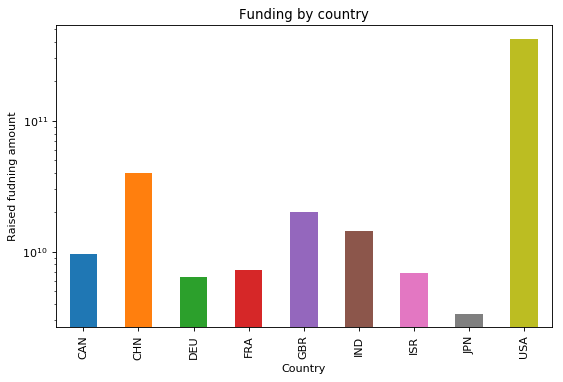

In [680]:
# investements 
plt.figure(figsize=(8, 5), dpi=80, facecolor='w', edgecolor='r')
top9_countries_data.groupby('country_code')['raised_amount_usd'].sum().plot(kind='bar')
plt.yscale('log')
plt.ylabel('Raised fudning amount')
plt.xlabel('Country')
plt.title('Funding by country')
plt.show()

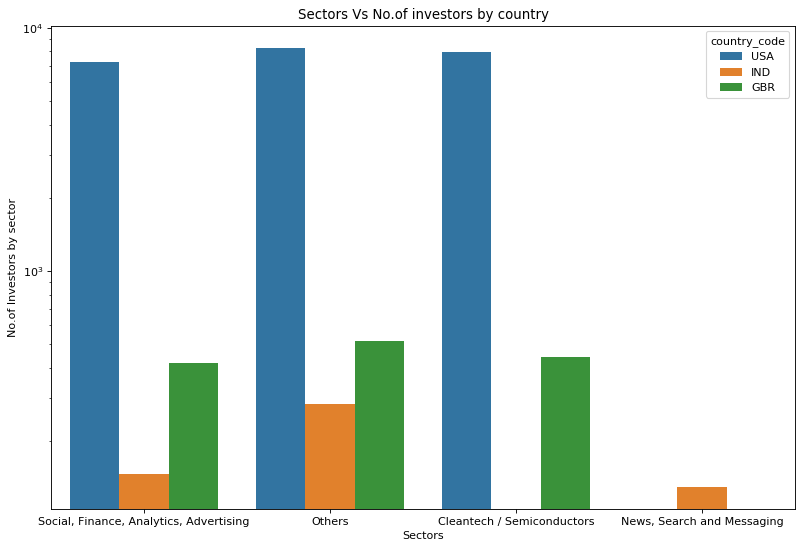

In [689]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='r')
re = pd.concat([D1,D2, D3], axis=1)
d1_top3 = D1.groupby('main_sector')['main_sector'].count().nlargest(3).index


re = D1[D1.main_sector.isin(d1_top3)]

d2_top3 = D2.groupby('main_sector')['main_sector'].count().nlargest(3).index
re = re.append(D2[D2.main_sector.isin(d2_top3)])

d3_top3 = D3.groupby('main_sector')['main_sector'].count().nlargest(3).index
re = re.append(D3[D3.main_sector.isin(d3_top3)])

sns.barplot(x='main_sector', y='no_of_invt_by_sector', hue='country_code', data=re)
plt.yscale('log')
plt.ylabel('No.of Investors by sector')
plt.xlabel('Sectors')
plt.title('Sectors Vs No.of investors by country')
plt.show()